In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
sns.set()

In [44]:
#データの読み込み

lunch_train_data = pd.read_csv("train.csv")
lunch_test_data = pd.read_csv("test.csv")

In [45]:
print("trainデータの大きさ",lunch_train_data.shape)
print("testデータの大きさ",lunch_test_data.shape)

trainデータの大きさ (207, 12)
testデータの大きさ (40, 11)


In [46]:
#カラム名
lunch_train_data.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [47]:
#datatype
lunch_train_data.dtypes

datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object

In [173]:
#各カラムの欠損数
lunch_train_data.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal               0
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
dtype: int64

欠損値  
kcal：カロリー  
remarks：特記事項  
event：社内イベント  
payday：給料日フラグ  


In [49]:
lunch_train_data.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


# 販売数の推移

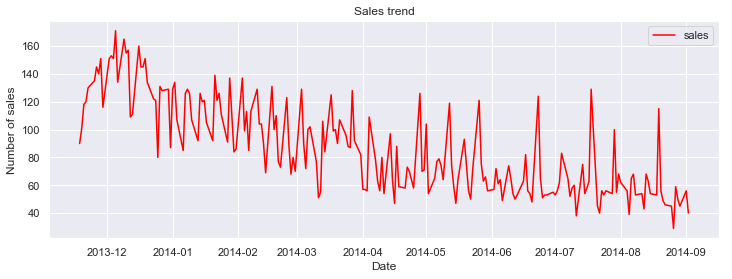

In [50]:
#販売数の推移

x1 = pd.date_range('2013-11-18 00:00:00',periods=207,freq='B')
#x2 = pd.date_range('2014-10-01 00:00:00',periods=40,freq='B')

plt.figure(figsize=(12,4))
plt.plot(x1,lunch_train_data["y"],label="sales",c = "red")

plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()


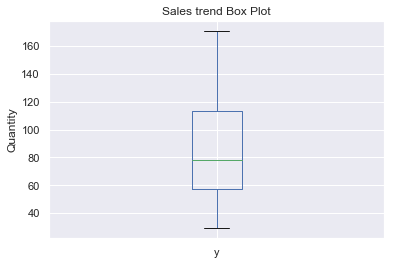

In [51]:
lunch_train_data["y"].plot.box()
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

In [52]:
lunch_train_data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


# 説明変数

気温

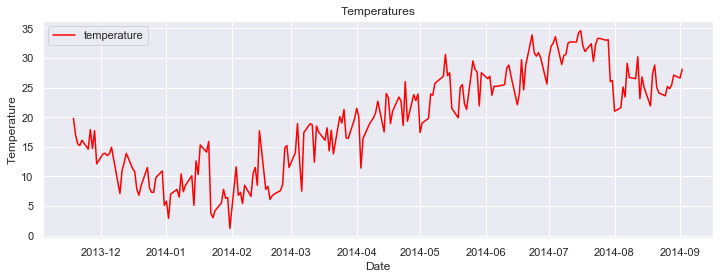

In [53]:
#販売数の推移

x1 = pd.date_range('2013-11-18 00:00:00',periods=207,freq='B')
#x2 = pd.date_range('2014-10-01 00:00:00',periods=40,freq='B')

plt.figure(figsize=(12,4))
plt.plot(x1,lunch_train_data["temperature"],label="temperature",c = "red")

plt.title("Temperatures")
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.legend()


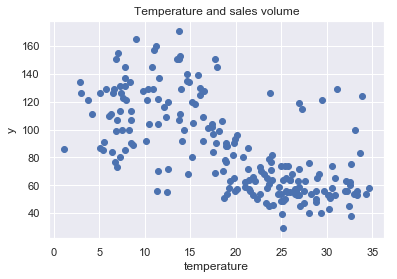

In [54]:
#散布図の作成
plt.scatter(lunch_train_data["temperature"],lunch_train_data["y"])
plt.xlabel("temperature")
plt.ylabel("y")
plt.title("Temperature and sales volume")
plt.show()

In [55]:
#相関
print("相関係数：",lunch_train_data["temperature"].corr(lunch_train_data["y"])
)

相関係数： -0.6553321917313495


soldout

In [56]:
print("kind of soldout :",lunch_train_data["soldout"].unique())
print("完売してない日数：",lunch_train_data[lunch_train_data["soldout"] == 0].shape[0])
print("完売している日数：",lunch_train_data[lunch_train_data["soldout"] == 1].shape[0])

kind of soldout : [0 1]
完売してない日数： 114
完売している日数： 93


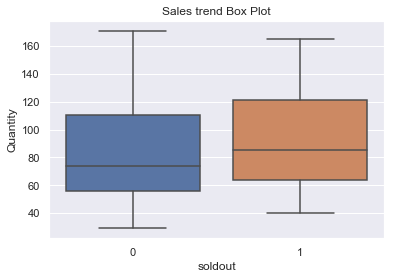

In [57]:
#完売しているときとしていないときの売上個数

sns.boxplot(lunch_train_data["soldout"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

kcal

In [58]:
print("欠損数：",lunch_train_data["kcal"].isnull().sum())

欠損数： 41


In [59]:
#欠損値は0で埋める
lunch_train_data["kcal"] = lunch_train_data["kcal"].fillna(0)
print("欠損数：",lunch_train_data["kcal"].isnull().sum())

欠損数： 0


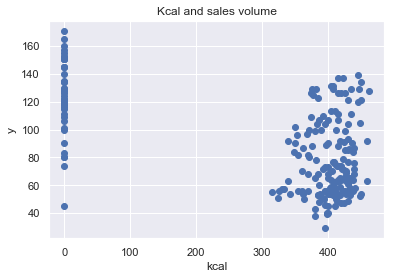

In [60]:
#散布図

#散布図の作成
plt.scatter(lunch_train_data["kcal"],lunch_train_data["y"])
plt.xlabel("kcal")
plt.ylabel("y")
plt.title("Kcal and sales volume")
plt.show()

object型

1:datetime

In [61]:
lunch_train_data["month"] = 0
date = lunch_train_data["datetime"]
maxs = date.size
print(maxs)
for i in range(0,maxs):
    lunch_train_data["month"][i] = int(date[i][5:7].replace("-",""))
print("month: ",lunch_train_data["month"].unique())

207
month:  [11 12  1  2  3  4  5  6  7  8  9]


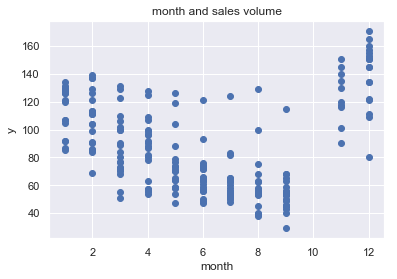

In [62]:
#散布図の作成
plt.scatter(lunch_train_data["month"],lunch_train_data["y"])
plt.xlabel("month")
plt.ylabel("y")
plt.title("month and sales volume")
plt.show()

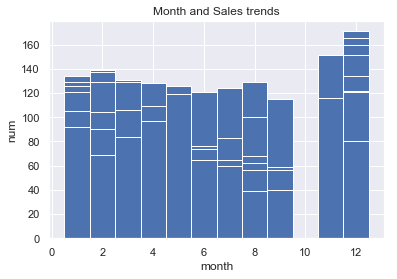

In [63]:
plt.bar(lunch_train_data["month"],lunch_train_data["y"],width=1.0,align="center")
plt.xlabel("month")
plt.ylabel("num")
plt.title("Month and Sales trends")
plt.grid(True)
plt.show()

In [64]:
from mpl_toolkits.mplot3d import Axes3D

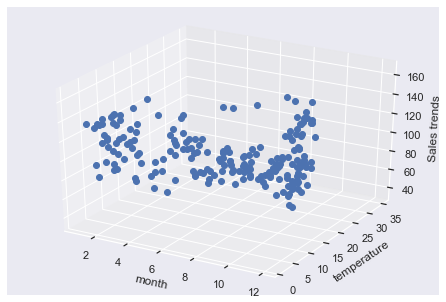

In [65]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("month")
ax.set_ylabel("temperature")
ax.set_zlabel("Sales trends")

X = lunch_train_data["month"]
Y = lunch_train_data["temperature"]
Z = lunch_train_data["y"]
ax.plot(X, Y, Z,marker="o",linestyle='None')

plt.show()

月と気温

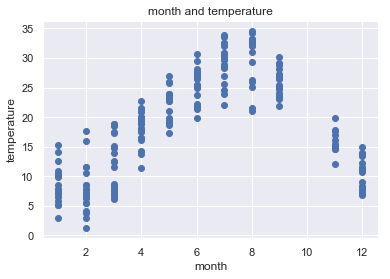

In [66]:
#散布図の作成
plt.scatter(lunch_train_data["month"],lunch_train_data["temperature"])
plt.xlabel("month")
plt.ylabel("temperature")
plt.title("month and temperature")
plt.show()

2:week

In [67]:
#曜日の種類
print("kind of week :",lunch_train_data["week"].unique())
lunch_train_data.loc[lunch_train_data["week"] == "月","week"] = "M"
lunch_train_data.loc[lunch_train_data["week"] == "火","week"] = "Tu"
lunch_train_data.loc[lunch_train_data["week"] == "水","week"] = "W"
lunch_train_data.loc[lunch_train_data["week"] == "木","week"] = "Th"
lunch_train_data.loc[lunch_train_data["week"] == "金","week"] = "F"
#lunch_train_data[lunch_train_data["week"] == "月"]["week"] = "M"

kind of week : ['月' '火' '水' '木' '金']


In [68]:
lunch_train_data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month
0,2013-11-18,90,M,0,厚切りイカフライ,0.0,NaN,NaN,NaN,快晴,--,19.8,11
1,2013-11-19,101,Tu,1,手作りヒレカツ,0.0,NaN,NaN,NaN,快晴,--,17.0,11
2,2013-11-20,118,W,0,白身魚唐揚げ野菜あん,0.0,NaN,NaN,NaN,快晴,--,15.5,11
3,2013-11-21,120,Th,1,若鶏ピリ辛焼,0.0,NaN,NaN,NaN,快晴,--,15.2,11
4,2013-11-22,130,F,1,ビッグメンチカツ,0.0,NaN,NaN,NaN,快晴,--,16.1,11


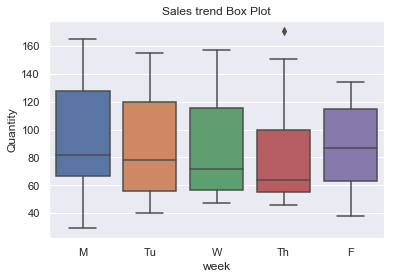

In [69]:
sns.boxplot(lunch_train_data["week"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

3:天気

In [70]:
#天気の種類
print("kind of weathers :",lunch_train_data["weather"].unique())


kind of weathers : ['快晴' '曇' '晴れ' '薄曇' '雨' '雪' '雷電']


In [71]:
lunch_train_data.loc[lunch_train_data["weather"] == "快晴","weather"] = "Su1"
lunch_train_data.loc[lunch_train_data["weather"] == "曇","weather"] = "Cl"
lunch_train_data.loc[lunch_train_data["weather"] == "晴れ","weather"] = "Su2"
lunch_train_data.loc[lunch_train_data["weather"] == "薄曇","weather"] = "li Cl"
lunch_train_data.loc[lunch_train_data["weather"] == "雨","weather"] = "Ra"
lunch_train_data.loc[lunch_train_data["weather"] == "雪","weather"] = "Sn"
lunch_train_data.loc[lunch_train_data["weather"] == "雷電","weather"] = "Raiden"

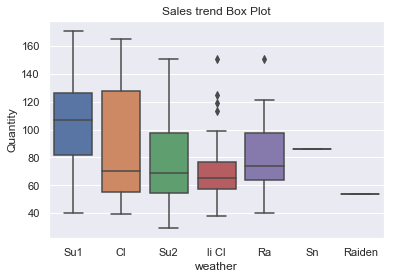

In [72]:
sns.boxplot(lunch_train_data["weather"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

In [73]:
lunch_train_data["weather"].value_counts()

Su1       53
Cl        53
Su2       50
li Cl     25
Ra        24
Raiden     1
Sn         1
Name: weather, dtype: int64

4:特記事項

In [171]:
#特記事項の種類
print("kind of remarks :",lunch_train_data["remarks"].unique())


kind of remarks : [nan 'LeAndCu' 'PoAndCu' 'FMenu' 'spMenu' 'HoMenu' 'sp800']


In [176]:
print(lunch_train_data["remarks"].isnull().sum())
lunch_train_data["remarks"] = lunch_train_data["remarks"].fillna("Not")
lunch_train_data["remarks"].value_counts()

186


Not        186
FMenu       12
spMenu       5
HoMenu       1
PoAndCu      1
LeAndCu      1
sp800        1
Name: remarks, dtype: int64

In [177]:
lunch_train_data.loc[lunch_train_data["remarks"] == "お楽しみメニュー","remarks"] = "FMenu"
lunch_train_data.loc[lunch_train_data["remarks"] == "料理長のこだわりメニュー","remarks"] = "spMenu"
lunch_train_data.loc[lunch_train_data["remarks"] == "手作りの味","remarks"] = "HoMenu"
lunch_train_data.loc[lunch_train_data["remarks"] == "スペシャルメニュー（800円）","remarks"] = "sp800"
lunch_train_data.loc[lunch_train_data["remarks"] == "鶏のレモンペッパー焼（50食）、カレー（42食）","remarks"] = "LeAndCu"
lunch_train_data.loc[lunch_train_data["remarks"] == "酢豚（28食）、カレー（85食）","remarks"] = "PoAndCu"

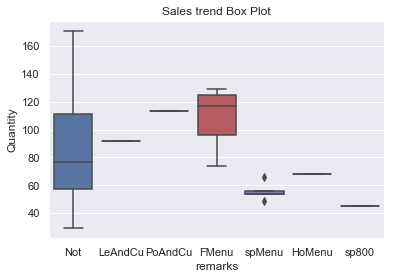

In [178]:
sns.boxplot(lunch_train_data["remarks"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

5:event

In [79]:
#特記事項の種類
print("kind of event :",lunch_train_data["event"].unique())


kind of event : [nan 'ママの会' 'キャリアアップ支援セミナー']


In [80]:
lunch_train_data["event"].value_counts()

ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

In [81]:
lunch_train_data.loc[lunch_train_data["event"] == "ママの会","event"] = "Mom"
lunch_train_data.loc[lunch_train_data["event"] == "キャリアアップ支援セミナー","event"] = "Seminar"

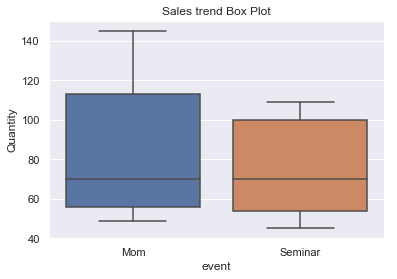

In [82]:
sns.boxplot(lunch_train_data["event"],lunch_train_data["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

6:name

In [143]:
#nameの種類
print("kind of name :",lunch_train_data["name"].nunique())


kind of name : 156


In [144]:
#3回以上出たランチのみに絞る
name_value_counts = lunch_train_data["name"].value_counts()
more_lunch_name = []
for i in range(0,155):
    if name_value_counts[i] >= 3:
        print(name_value_counts.index[i],":",name_value_counts[i])
        more_lunch_name.append(name_value_counts.index[i])

タンドリーチキン : 6
メンチカツ : 6
手作りロースカツ : 5
マーボ豆腐 : 4
肉じゃが : 4
鶏の唐揚げおろしソース : 4
回鍋肉 : 4
チンジャオロース : 3
酢豚 : 3
チキンカレー : 3
手作りひれかつ : 3
ポークカレー : 3
鶏の味噌漬け焼き : 3
キーマカレー : 3


In [146]:
more_lunch_list = lunch_train_data[lunch_train_data["name"].isin(more_lunch_name)]

In [148]:
more_lunch_list.loc[more_lunch_list["name"] == "タンドリーチキン","name"] = "TCh"
more_lunch_list.loc[more_lunch_list["name"] == "メンチカツ","name"] = "Men"
more_lunch_list.loc[more_lunch_list["name"] == "手作りロースカツ","name"] = "HRo"
more_lunch_list.loc[more_lunch_list["name"] == "マーボ豆腐","name"] = "MTo"
more_lunch_list.loc[more_lunch_list["name"] == "肉じゃが","name"] = "MPo"
more_lunch_list.loc[more_lunch_list["name"] == "鶏の唐揚げおろしソース","name"] = "FCh"
more_lunch_list.loc[more_lunch_list["name"] == "回鍋肉","name"] = "RPo"
more_lunch_list.loc[more_lunch_list["name"] == "チンジャオロース","name"] = "CJa"
more_lunch_list.loc[more_lunch_list["name"] == "酢豚","name"] = "SPo"
more_lunch_list.loc[more_lunch_list["name"] == "チキンカレー","name"] = "CCu"
more_lunch_list.loc[more_lunch_list["name"] == "手作りひれかつ","name"] = "HFi"
more_lunch_list.loc[more_lunch_list["name"] == "ポークカレー","name"] = "PCu"
more_lunch_list.loc[more_lunch_list["name"] == "鶏の味噌漬け焼き","name"] = "Gch"
more_lunch_list.loc[more_lunch_list["name"] == "キーマカレー","name"] = "KCu"

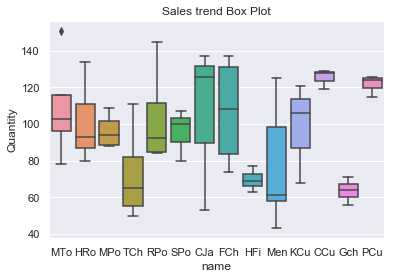

In [149]:
sns.boxplot(more_lunch_list["name"],more_lunch_list["y"])
plt.title("Sales trend Box Plot")
plt.ylabel("Quantity")
plt.show()

・気温が低いと弁当が多く売れる  
・気温が低いのは11月～2月当たりでこの辺は弁当の売り上げ数が多い  
・季節で弁当の売り上げが変動する  

------  

中央値が他と大きく違うため  
・天気で快晴とそれ以外で見比べて見る  
・お楽しみメニューとそれ以外で見比べて見る    

# 快晴とその他で切り分ける